<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/Data_analyst_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Interview Notebook

## Introduction

This notebook is designed to simulate real-world data that you could see from our technology. 

It is designed to test your proficiency with Python and Pandas, and your ability to find and present insights.

This data is confidential; we expect you to not share this data with anyone. And we expect you to not get any external assistance.



---


You have been hired by Wiliot and are working with a US retail customer on a pilot deployment.  They are using our technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup. 

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment. 



---

Each section has defined questions along with point values to help you prioritize your time.  

In addition to the defined questions, the overall notebook and code presentation will be evaluated, and you will be awarded up to 10 points based on the clarity, cleaniness, and efficiency of the code.


SCORING:
* Part 1: 8 Points
* Part 2: 12 Points
* Part 3: 20 points
* Code Quality: 10 points
* Part 4: BONUS: Up to 15 points.


## Part 0: Imports

Import necessary packages and 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import copy
import seaborn as sns
import datetime
#Please add any additional imports here


In [2]:
# Import Dataset

df = pd.read_excel('tote_shipment.xlsx')

In [3]:
#Look at the first few columns of the dataset
df.head()

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
0,tote,102,(01)00850027865010(21)0082T0932,DC 1,pallet_assembly_DC1,F96E864E4F18,2022-08-02 11:57:38.044,47.79158,-65.68902,22.5,72.5
1,tote,102,(01)00850027865010(21)0082T0932,DC 1,pallet_assembly_DC1,F96E864E4F18,2022-08-02 12:00:57.803,47.79158,-65.68902,22.5,72.5
2,tote,102,(01)00850027865010(21)0082T0932,DC 1,pallet_assembly_DC1,F96E864E4F18,2022-08-02 12:06:46.752,47.79158,-65.68902,22.5,72.5
3,tote,102,(01)00850027865010(21)0082T0932,DC 1,pallet_assembly_DC1,F96E864E4F18,2022-08-02 12:08:19.072,47.79158,-65.68902,22.5,72.5
4,tote,102,(01)00850027865010(21)0082T0932,DC 1,pallet_assembly_DC1,F96E864E4F18,2022-08-02 12:09:58.231,47.79158,-65.68902,22.5,72.5


In [10]:
# per asset id, there are two tag id s
df[['asset_id',  'tag_id']].drop_duplicates()

,asset_id,tag_id
0,102,(01)00850027865010(21)0082T0932
69,102,(01)00850027865010(21)0082T0329
8205,145,(01)00850027865010(21)0082T0458
8215,145,(01)00850027865010(21)0082T0609
12261,149,(01)00850027865010(21)0082T0261
12262,149,(01)00850027865010(21)0082T0260
18610,159,(01)00850027865010(21)0082T0197
18611,159,(01)00850027865010(21)0082T0196
25218,167,(01)00850027865010(21)0082T0575
25223,167,(01)00850027865010(21)0082T0574


In [23]:
# asset id : zone = 1 : many
df[df.asset_id == 102]['Zone'].drop_duplicates()

0       pallet_assembly_DC1
6             Forklift1_DC1
62              staging_DC1
67            Forklift3_DC1
84           dock_doors_DC1
126         PhoneKit2Bridge
127         PhoneKit1Bridge
144             PhoneKit2GW
1204         dock_doors_DC2
1473            PhoneKit1GW
1535        receiving_Store
1544       store_back_Store
1753      store_front_Store
2037    point_of_sale_Store
Name: Zone, dtype: object

In [13]:
# asset id : tag id = 1: 2
df[df.asset_id == 102][['tag_id']].drop_duplicates()

,tag_id
0,(01)00850027865010(21)0082T0932
69,(01)00850027865010(21)0082T0329


In [26]:
df[df.tag_id == '(01)00850027865010(21)0082T0932']['Zone'].drop_duplicates()

0       pallet_assembly_DC1
6             Forklift1_DC1
62              staging_DC1
67            Forklift3_DC1
84           dock_doors_DC1
126         PhoneKit2Bridge
133         PhoneKit1Bridge
144             PhoneKit2GW
1204         dock_doors_DC2
1473            PhoneKit1GW
1536        receiving_Store
1544       store_back_Store
1753      store_front_Store
Name: Zone, dtype: object

In [27]:
df[df.tag_id == '(01)00850027865010(21)0082T0329']['Zone'].drop_duplicates()

69              staging_DC1
127         PhoneKit1Bridge
131         PhoneKit2Bridge
197             PhoneKit2GW
1535        receiving_Store
1646       store_back_Store
1754      store_front_Store
2037    point_of_sale_Store
Name: Zone, dtype: object

In [12]:
# asset id : device id = 1: many
df[df.asset_id == 102][['device_id']].drop_duplicates()

,device_id
0,F96E864E4F18
5,7436A2B82DC1
6,E2F5A528ABFC
62,770B915B6470
65,4841FD2819D9
67,6EEDDB0D6881
69,758ECEA02EA7
70,99A61D1647F7
84,0B2FD04933B5
107,36BA90E8F876


In [19]:
df[(df.asset_id == 102) & (df.device_id=='F96E864E4F18')]['tag_id'].drop_duplicates()

0    (01)00850027865010(21)0082T0932
Name: tag_id, dtype: object

### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt) **18**

In [4]:
# YOUR CODE HERE:
len(df['asset_id'].drop_duplicates())

18

What are the unique zones we could see (1 pt)

In [5]:
df['Zone'].drop_duplicates().values.tolist()

['pallet_assembly_DC1',
 'Forklift1_DC1',
 'staging_DC1',
 'Forklift3_DC1',
 'dock_doors_DC1',
 'PhoneKit2Bridge',
 'PhoneKit1Bridge',
 'PhoneKit2GW',
 'dock_doors_DC2',
 'PhoneKit1GW',
 'receiving_Store',
 'store_back_Store',
 'store_front_Store',
 'point_of_sale_Store',
 'staging_DC2']

In [13]:
len(df['Zone'].drop_duplicates().values.tolist())

15

* How many POI's are in each Zone. (2 pts) 

In [6]:
df.groupby(['Zone'])['asset_id'].value_counts()

Zone               asset_id
Forklift1_DC1      200          5
                   37           4
                   52           3
                   84           3
                   149          3
                               ..
store_front_Store  70          92
                   62          85
                   37          47
                   167         19
                   181         18
Name: asset_id, Length: 236, dtype: int64

### Question 2:

* What is the temperature range we see?  (1pt) **Temperature_C ranges between 19 degc to 44 deg c**

* Where is temperature the highest and lowest (1pt) **Highest temparature of Temperature_C is 44 deg c and lowest temparature is 19 deg c**

In [14]:
# YOUR CODE HERE:
df['Temperature_C'].describe()

count    130061.000000
mean         25.874445
std           2.795208
min          19.000000
25%          24.000000
50%          25.000000
75%          27.500000
max          44.000000
Name: Temperature_C, dtype: float64

## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

In [71]:
# YOUR CODE HERE:
df_temp = df.groupby(['Zone']).agg({'time_est': [np.min, np.max]}).reset_index()
df_temp.columns = ['Zone', 'min_time', 'max_time']
df_temp['time_spent'] = df_temp['max_time'] - df_temp['min_time']
df_temp['time_spent'] = df_temp['time_spent'].dt.total_seconds().round()
df_temp

,Zone,min_time,max_time,time_spent
0,Forklift1_DC1,2022-08-02 10:14:54.326,2022-08-02 13:43:52.244,12538.0
1,Forklift3_DC1,2022-08-02 11:40:55.665,2022-08-02 14:13:28.137,9152.0
2,PhoneKit1Bridge,2022-08-02 13:45:19.896,2022-08-04 08:37:59.164,154359.0
3,PhoneKit1GW,2022-08-03 13:45:25.721,2022-08-04 06:07:57.096,58951.0
4,PhoneKit2Bridge,2022-08-02 13:47:42.876,2022-08-04 08:35:02.201,154039.0
5,PhoneKit2GW,2022-08-02 13:49:15.897,2022-08-04 08:34:20.755,153905.0
6,dock_doors_DC1,2022-08-02 10:20:43.706,2022-08-02 13:58:03.180,13039.0
7,dock_doors_DC2,2022-08-02 23:30:22.224,2022-08-04 03:46:27.100,101765.0
8,pallet_assembly_DC1,2022-08-02 10:15:38.860,2022-08-02 13:51:21.013,12942.0
9,point_of_sale_Store,2022-08-04 10:32:54.928,2022-08-05 08:45:22.306,79947.0


<Axes: xlabel='Zone'>

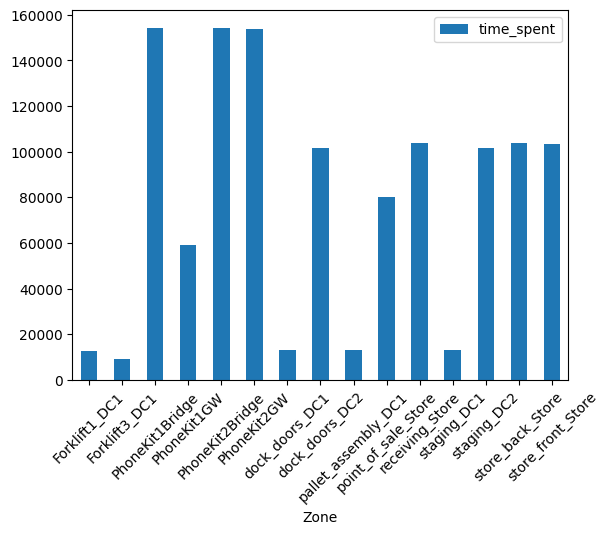

In [75]:
df_temp.plot.bar(x='Zone', y='time_spent', rot=45)

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



In [63]:
df.groupby(['device_id'])['asset_id' ].count()

device_id
08D0A74A7C1D         2618
0B2FD04933B5           21
11977BD156C6         1124
26AB1C9A2E41          511
2B4DC74C0878           20
2FC8DD79125D          124
36BA90E8F876           68
379663A695EF         1328
38A44056604C8F70       89
3D8B2BDB8673           21
4710E397D1FA           33
4841FD2819D9           46
4F6D8CFDC0BD            7
58DB59BDCE08         8919
5B2B2FDFD70A2202      869
69F24D678C1C        14604
6AF833197EE3          770
6EEDDB0D6881           75
7436A2B82DC1          118
747F99C09A08        14676
758ECEA02EA7          156
770B915B6470           57
7F9A8353E973           43
99A61D1647F7          265
9AC4A4154B28          102
AC8DEAE6FD79        43611
BAE5E8CF978C           18
C7FA15BE7D1B          149
C8C08D22E0B1         1103
DC4FBAED57C9        22484
E2F5A528ABFC           31
E6D3501BACAE           52
EC5B0499234F           37
EEEB01ADE266           45
F2F715EFF03F        15504
F57AA72F5B15           22
F96E864E4F18          337
GW0CDC7EDDDEB8          4
Na

In [28]:
df[df['device_id'] == 'F96E864E4F18'][['asset_id']].drop_duplicates()

,asset_id
0,102
8205,145
25221,167
31993,170
38568,181
42068,182
47933,2
54701,200
62830,205
67953,37


Text(0.5, 1.0, 'Temperature Change over Time')

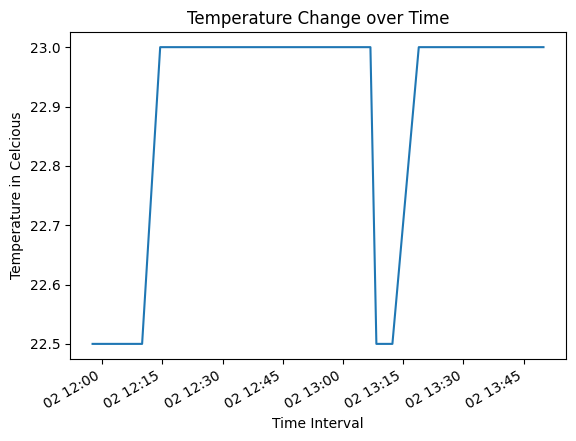

In [29]:
# YOUR CODE HERE:
df_example = copy.deepcopy(df[(df['device_id'] == 'F96E864E4F18') & (df.asset_id == 102)] )
df_example.set_index('time_est', inplace = True)
df_example['Temperature_C'].plot()
plt.xlabel("Time Interval")
plt.ylabel("Temperature in Celcious")
plt.title("Temperature Change over Time")

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [30]:
# YOUR CODE HERE:
fig = px.scatter_geo(df_example, lat = 'lat', lon = 'lng')
# setting title for the map
fig.update_layout(title = 'State', title_x = 0.5)
fig.show()

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)



In [77]:
# YOUR CODE HERE
#df_example.reset_index(inplace = True)
df_temp_1 = df[~df['Zone'].isin(['store_back_Store','store_front_Store','point_of_sale_Store'])].groupby(['Zone']).agg({'time_est': [np.min, np.max]}).reset_index()
df_temp_1.columns = ['Zone', 'min_time', 'max_time']
df_temp_1['time_spent'] = df_temp_1['max_time'] - df_temp_1['min_time']
df_temp_1['time_spent'] = df_temp_1['time_spent'].dt.total_seconds().round()
df_temp_1.sort_values(by=['time_spent'])

,Zone,min_time,max_time,time_spent
1,Forklift3_DC1,2022-08-02 11:40:55.665,2022-08-02 14:13:28.137,9152.0
0,Forklift1_DC1,2022-08-02 10:14:54.326,2022-08-02 13:43:52.244,12538.0
8,pallet_assembly_DC1,2022-08-02 10:15:38.860,2022-08-02 13:51:21.013,12942.0
6,dock_doors_DC1,2022-08-02 10:20:43.706,2022-08-02 13:58:03.180,13039.0
10,staging_DC1,2022-08-02 10:17:23.366,2022-08-02 13:58:04.030,13241.0
3,PhoneKit1GW,2022-08-03 13:45:25.721,2022-08-04 06:07:57.096,58951.0
7,dock_doors_DC2,2022-08-02 23:30:22.224,2022-08-04 03:46:27.100,101765.0
11,staging_DC2,2022-08-02 23:30:24.468,2022-08-04 03:46:49.908,101785.0
9,receiving_Store,2022-08-04 08:35:16.191,2022-08-05 13:28:29.966,103994.0
5,PhoneKit2GW,2022-08-02 13:49:15.897,2022-08-04 08:34:20.755,153905.0


**Overall, Forklift3_DC1operation is very efficient on average whereas PhoneKit1Bridge and PhoneKit2Bridge are lenghiest operations and spend more than a day.**

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [78]:
# YOUR CODE HERE
df_store = df[df['Zone'].isin(['store_back_Store','store_front_Store','point_of_sale_Store'])]
df_store = df_store.groupby(['Zone']).agg({'time_est': [np.min, np.max]}).reset_index()
df_store.columns = ['Zone', 'min_time', 'max_time']
df_store['time_spent'] = df_store['max_time'] - df_store['min_time']
df_store['time_spent'] = df_store['time_spent'].dt.total_seconds().round()
df_store.sort_values(by=['time_spent'])

,Zone,min_time,max_time,time_spent
0,point_of_sale_Store,2022-08-04 10:32:54.928,2022-08-05 08:45:22.306,79947.0
2,store_front_Store,2022-08-04 08:36:25.443,2022-08-05 13:22:27.897,103562.0
1,store_back_Store,2022-08-04 08:35:20.926,2022-08-05 13:28:25.330,103984.0


In [80]:
(103984.0 - 79947.0) / 3600

6.676944444444445

To get to the store, it takes 79947 seconds whereas unloading at store takes more time. Time difference in seconds is 24037 seconds (~7 hours).

If we can convert the time taken at each step in a measuranble units (hour/30 minutes), it will be helpful for the manager to track.

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):
* a.	Your implementation/hardware engineer (those who can add functionalities to your product)
* b.	The customer

YOUR TEXT ANSWER HERE
* a. If I can ask for more breakdown/normalize to the data, it will be helpful. Ex. A site has multiple zones and in one zone we can have multiple assets. It will be helpful to add some derived features like time spent in each zone in seconds, average temprature maintained historically etc. If the derived values are beyond historical values, we can trigger alerts. 

* b. For the customer, I would like to ask them what are the pain points that they have and how we can solve it. Do they want to track the temparature of the units or do they need time taken at each step on average and how it comopares to historical figures, do they fall within the given range or not etc. 

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points) 



In [ ]:
# YOUR CODE HERE


1. Customer might be interested to know historically how much time it took at each container type (container carrying fruits/meat etc).
2. Customer might be interested to know the time spent on transit.
3. Customner might also want to know if we can provide any optimized track for the freight trucks.
4. Some checks and balances and comparison on the hostorical data with the current one, to show if it's within or outside the range of historical numbers.
5. Based on historical data, customer might want to get an estimated forecast values of how long will it take to perform certian activities at each step. It may depend on day, time, holiday, weather etc.
6. Based on historical data, customer will be interested to know what should be the optimized temparature maintained.
